<a href="https://colab.research.google.com/github/Sundeepan-Sen/rate-of-return-calculator/blob/main/Crypto_Rate_of_Return_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data
1.   numpy for the logarithm function
2.   pandas_datareader for the crypto data
3.   matplotlib for plotting graphs



In [175]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Set Number of Days in a Year
###### Crypto is traded 24/7

In [176]:
# https://en.wikipedia.org/wiki/Year#:~:text=In%20the%20Julian%20calendar%2C%20the,year%20there%20are%20366%20days.
DAYS_IN_YEAR = 365.25
#DAYS_IN_YEAR = 221

# Define Functions


*   ` get_ticker_symbol():` gets the ticker symbol
*   `get_start_date(): ` gets the start date. If none is specified then MAX
*   `get_simple_ror(data_frame):` calculates simple ror
*   `get_average_returns_daily(data_frame):`calculates average daily return
*  ` def get_average_returns_annually(data_frame):`calculates average returns annually
*   `def get_log_ror(data_frame):`calculates logarithmic rate of return
*   `def get_log_returns_daily(data_frame):`calculates average daily log return
*   `def get_log_returns_annually(data_frame):`alculates average log returns annually



In [194]:
def get_ticker_symbol():
  return input("Enter Ticker Symbol: ")

def get_start_date():
  return input("Enter Start date from when you want to get data. Example: 2014-09-16 or enter for from the beginning of time: ")

# Get's data for specified Crypto or Security - Use Yahoo Finanace website as 
# reference.
def get_data(ticker):  
  data = wb.DataReader(ticker, data_source='yahoo', start=start_date)
  return data

def get_simple_ror(data_frame):
  data_frame['simple_return'] = (data_frame['Adj Close'] / data_frame['Adj Close'].shift(1)) - 1
  return data_frame['simple_return']

def get_average_returns_daily(data_frame):
  average_returns_daily = data_frame['simple_return'].mean()
  return average_returns_daily

def get_average_returns_annually(data_frame):
  average_returns_annually = data_frame['simple_return'].mean() * DAYS_IN_YEAR
  return average_returns_annually

def get_log_ror(data_frame):
  data_frame['log_return'] = np.log(data_frame['Adj Close'] / data_frame['Adj Close'].shift(1))
  return data_frame['log_return']

def get_log_returns_daily(data_frame):
  log_returns_daily = data_frame['log_return'].mean()
  return log_returns_daily

def get_log_returns_annually(data_frame):
  log_returns_annually = data_frame['log_return'].mean() * DAYS_IN_YEAR
  return log_returns_annually

# Run Program

In [178]:
# Get ticker symbol and start date. Press enter for max date.
# Run program - asks for user input
ticker = get_ticker_symbol()
start_date = get_start_date()
print()

Enter Ticker Symbol: DOGE-USD
Enter Start date from when you want to get data. Example: 2014-09-16 or enter for from the beginning of time: 



In [179]:
# call to get_data for ticker data frame.
symbol_dataframe = get_data(ticker)
print('[' +ticker+']' + ' ' + 'Start Date ' + start_date)
print(symbol_dataframe)

[DOGE-USD] Start Date 
                High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2016-05-03  0.000228  0.000224  0.000226  0.000225  7.123900e+04   0.000225
2016-05-04  0.000227  0.000219  0.000225  0.000221  1.495670e+05   0.000221
2016-05-05  0.000227  0.000219  0.000220  0.000225  9.225000e+04   0.000225
2016-05-06  0.000225  0.000221  0.000224  0.000223  8.375400e+04   0.000223
2016-05-07  0.000223  0.000220  0.000222  0.000222  4.696100e+04   0.000222
...              ...       ...       ...       ...           ...        ...
2021-04-27  0.344662  0.256231  0.272273  0.323682  1.446434e+10   0.323682
2021-04-28  0.323881  0.296904  0.323232  0.305169  5.027355e+09   0.305169
2021-04-29  0.339757  0.302981  0.304702  0.337561  5.290391e+09   0.337561
2021-04-30  0.397135  0.328290  0.337559  0.392987  1.012334e+10   0.392987
2021-05-03  0.385536  0.375441  0.375441  0.383387  7.154566e+09 

In [183]:
# Analyze the dataset
print(symbol_dataframe.describe())

              High          Low  ...    Adj Close  simple_return
count  1821.000000  1821.000000  ...  1821.000000    1820.000000
mean      0.008419     0.007041  ...     0.007836       0.007529
std       0.035575     0.027627  ...     0.032368       0.100928
min       0.000205     0.000195  ...     0.000197      -0.402570
25%       0.001612     0.001387  ...     0.001520      -0.020561
50%       0.002571     0.002443  ...     0.002511       0.000000
75%       0.003448     0.003189  ...     0.003308       0.019330
max       0.437700     0.375441  ...     0.407318       2.756432

[8 rows x 7 columns]


In [184]:
print(get_simple_ror(symbol_dataframe))

Date
2016-05-03         NaN
2016-05-04   -0.017778
2016-05-05    0.018100
2016-05-06   -0.008889
2016-05-07   -0.004484
                ...   
2021-04-27    0.189185
2021-04-28   -0.057195
2021-04-29    0.106145
2021-04-30    0.164196
2021-05-03   -0.024427
Name: simple_return, Length: 1821, dtype: float64


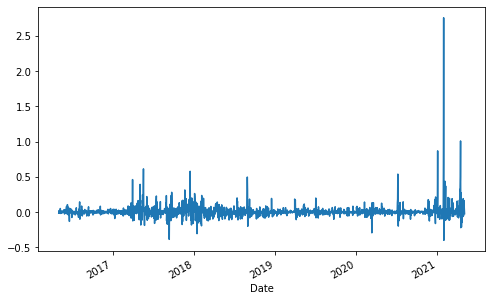

In [185]:
#plot simple return
sror = get_simple_ror(symbol_dataframe)
sror.plot(figsize=(8,5))

In [186]:
average_returns_daily = get_average_returns_daily(symbol_dataframe)
average_returns_daily
print("The average daily simple rate of return for " + ticker + " is " 
      + str(round(average_returns_daily, 5) * 100) + ' %')

The average daily simple rate of return for DOGE-USD is 0.753 %


In [187]:
average_returns_annually = get_average_returns_annually(symbol_dataframe)
average_returns_annually
print("The average annual simple rate of return for " + ticker + " is " 
      + str(round(average_returns_annually, 5) * 100) + ' %')

The average annual simple rate of return for DOGE-USD is 274.988 %


In [188]:
print(get_log_ror(symbol_dataframe))

Date
2016-05-03         NaN
2016-05-04   -0.017938
2016-05-05    0.017938
2016-05-06   -0.008929
2016-05-07   -0.004494
                ...   
2021-04-27    0.173269
2021-04-28   -0.058896
2021-04-29    0.100881
2021-04-30    0.152030
2021-05-03   -0.024731
Name: log_return, Length: 1821, dtype: float64


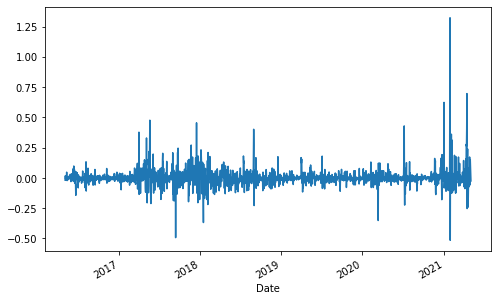

In [189]:
#plot simple return
lror = get_log_ror(symbol_dataframe)
lror.plot(figsize=(8,5))

In [190]:
average_log_returns_daily = get_log_returns_daily(symbol_dataframe)
average_log_returns_daily
print("The average daily logarithmic rate of return for " + ticker + " is " 
      + str(round(average_log_returns_daily, 5) * 100) + ' %')

The average daily logarithmic rate of return for DOGE-USD is 0.409 %


In [191]:
average_log_returns_annually = get_log_returns_annually(symbol_dataframe)
average_log_returns_annually
print("The average annual logarithmic rate of return for " + ticker + " is " 
      + str(round(average_log_returns_annually, 5) * 100) + ' %')

The average annual logarithmic rate of return for DOGE-USD is 149.325 %
